<a href="https://colab.research.google.com/github/nearxo/ActividadSistemasOperativos/blob/main/Reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
pip install sodapy

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata

# Modulo de importacion

Por sodapy

In [107]:
#sin usuario de socrata y con datos abiertos
client = Socrata("www.datos.gov.co", None)
# se debe especificar el número de registros a importar y la key de donde se va a importar
#aca esta el dataset que mas utilice por que tiene bastantes cosas curiosas con las que se puede trabajar pero se puede cambiar perfectamente
results = client.get("ynam-yc42", limit=2000)
df = pd.DataFrame.from_records(results)

por csv

In [ ]:
#lo dejo con comentarios para correrlo todo
#df = pd.read_csv(".csv")

#modulo filtrado o preprosesacmiento

In [108]:
##Eliminar columnas con un solo dato
while len(df[str(df.apply(lambda x: len(x.unique())).idxmin())].unique())==1:
  try:
    df.drop(str(df.apply(lambda x: len(x.unique())).idxmin()),inplace=True)
  except:
    break

# Modulo informacion

In [109]:
##Nulos general por columnas
df.isnull().sum()

estu_tipodocumento           0
estu_nacionalidad            0
estu_genero                  0
estu_fechanacimiento         0
periodo                      0
                            ..
estu_inse_individual         0
estu_nse_individual         76
estu_nse_establecimiento     0
estu_estadoinvestigacion     0
estu_generacion_e            0
Length: 82, dtype: int64

In [110]:
##Nulos por filas
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    7
1997    0
1998    0
1999    0
Length: 2000, dtype: int64

In [111]:
# Encontrar la cantidad de valores NaN consecutivos por columna
print(df.isnull().astype(int).cumsum(axis=1).sum(axis=0)[df.isnull().astype(int).cumsum(axis=1).sum(axis=0)!=0])

estu_depto_reside              1
estu_cod_reside_depto          1
estu_mcpio_reside              2
estu_cod_reside_mcpio          2
fami_estratovivienda           2
                            ... 
estu_inse_individual        1233
estu_nse_individual         1309
estu_nse_establecimiento    1309
estu_estadoinvestigacion    1309
estu_generacion_e           1309
Length: 72, dtype: int64


In [112]:
##Convertir todo lo que paresca numero a flotante
def try_convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return value
#         Itera a través de las columnas del DataFrame y aplica la función de conversión
for columna in df.columns:
    df[columna] = df[columna].apply(try_convert_to_float)

In [113]:
##columnas que tienen numeros
df.select_dtypes(include=["number"])

,periodo,cole_codigo_icfes,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_mcpio_ubicacion,cole_cod_depto_ubicacion,estu_cod_mcpio_presentacion,estu_cod_depto_presentacion,punt_lectura_critica,percentil_lectura_critica,...,desemp_c_naturales,punt_sociales_ciudadanas,percentil_sociales_ciudadanas,desemp_sociales_ciudadanas,punt_ingles,percentil_ingles,punt_global,percentil_global,estu_nse_individual,estu_nse_establecimiento
0,20194.0,39008.0,1.477070e+11,1.477070e+11,47707.0,47.0,47707.0,47.0,47.0,33.0,...,1.0,30.0,8.0,1.0,54.0,67.0,208.0,25.0,2.0,2.0
1,20194.0,128611.0,3.110011e+11,3.110011e+11,11001.0,11.0,11001.0,11.0,60.0,76.0,...,2.0,59.0,83.0,3.0,63.0,88.0,299.0,83.0,3.0,4.0
2,20194.0,35493.0,1.130010e+11,1.130010e+11,13001.0,13.0,13001.0,13.0,66.0,91.0,...,2.0,74.0,99.0,4.0,64.0,89.0,299.0,84.0,2.0,3.0
3,20194.0,138032.0,1.110011e+11,1.110011e+11,11001.0,11.0,11001.0,11.0,62.0,81.0,...,3.0,73.0,99.0,4.0,53.0,67.0,309.0,88.0,2.0,3.0
4,20194.0,217406.0,1.110011e+11,1.110011e+11,11001.0,11.0,11001.0,11.0,63.0,85.0,...,2.0,57.0,79.0,3.0,52.0,63.0,288.0,78.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20194.0,20842.0,1.110010e+11,1.110010e+11,11001.0,11.0,11001.0,11.0,57.0,68.0,...,2.0,39.0,33.0,1.0,46.0,44.0,243.0,49.0,2.0,3.0
1996,20194.0,78527.0,1.230010e+11,1.230010e+11,23001.0,23.0,23001.0,23.0,59.0,73.0,...,3.0,52.0,68.0,2.0,47.0,47.0,273.0,70.0,NaN,2.0
1997,20194.0,107888.0,2.231890e+11,2.231890e+11,23189.0,23.0,23189.0,23.0,64.0,86.0,...,2.0,57.0,79.0,3.0,59.0,82.0,292.0,80.0,1.0,1.0
1998,20194.0,57935.0,1.540010e+11,1.540010e+11,54001.0,54.0,54001.0,54.0,63.0,83.0,...,2.0,41.0,38.0,2.0,51.0,60.0,261.0,62.0,3.0,2.0


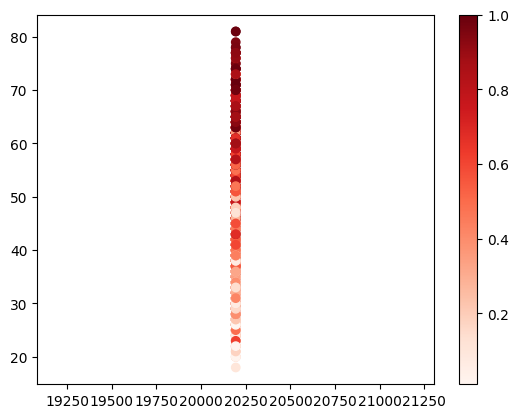

In [114]:
#mapa de color
plt.scatter(df[str(df.apply(lambda x: len(x.unique())).idxmin())],df.punt_sociales_ciudadanas,c=df.percentil_ingles.astype(int)/100,cmap="Reds")
plt.colorbar()
#df.select_dtypes(include=['int64', 'float64',"int","float","number"])


#Modulo limpieza

In [119]:
#Columnas con numeros que tienen datos Nan reemplazarlos por la media
numeros = df.select_dtypes(include=["number"])
indicesN=numeros.isnull().sum()
indicesN=indicesN[indicesN!=0]
for i in indicesN.index:
  #Para confirmar que se hizo imprimir la columna que se cambio o correrlo 2 veces
  print(i)
  #si se quiere cambiar por otro valor ↓aca↓ en este mean
  df[str(i)].fillna(value=df[str(i)].mean(),inplace=True)
#columnas que tienen datos nan
indices=df.isnull().sum()
indices=indices[indices!=0]
for i in indices.index:
  df[str(i)].fillna(method ="bfill",inplace=True)